###Importing Necessary Libraries

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings('ignore')

###Uploading the Dataset from UCI Library

In [93]:
from google.colab import files
uploaded = files.upload()

Saving Default of credit card clients.csv to Default of credit card clients.csv


In [94]:
dataset = pd.read_csv('Default of credit card clients.csv')
dataset.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


###Pre-Processing of Dataset

In [95]:
dataset.shape

(30000, 25)

In [96]:
dataset.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [97]:
dataset = dataset.drop(['ID'],axis=1)

<Axes: xlabel='default payment next month', ylabel='count'>

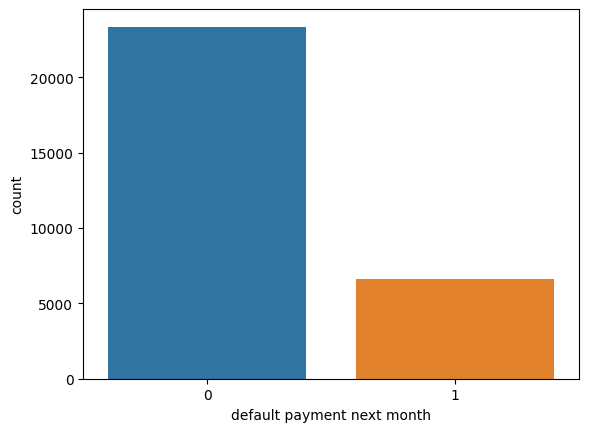

In [98]:
sns.countplot(x = 'default payment next month', data=dataset)

In [99]:
X = dataset.iloc[:,0:-1]
y = dataset['default payment next month']

In [100]:
ss = StandardScaler()
ss.fit_transform(X)

array([[-1.13672015,  0.81016074,  0.18582826, ..., -0.30806256,
        -0.31413612, -0.29338206],
       [-0.3659805 ,  0.81016074,  0.18582826, ..., -0.24422965,
        -0.31413612, -0.18087821],
       [-0.59720239,  0.81016074,  0.18582826, ..., -0.24422965,
        -0.24868274, -0.01212243],
       ...,
       [-1.05964618, -1.23432296,  0.18582826, ..., -0.03996431,
        -0.18322937, -0.11900109],
       [-0.67427636, -1.23432296,  1.45111372, ..., -0.18512036,
         3.15253642, -0.19190359],
       [-0.90549825, -1.23432296,  0.18582826, ..., -0.24422965,
        -0.24868274, -0.23713013]])

###Creation of 10 samples with 70-30 ratio of Training and Testing Set

In [101]:
samples = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    samples.append((X_train, X_test, y_train, y_test))

In [102]:
samples

[(       LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
  15925      30000    2          2         2   31     -2     -2     -2     -2   
  10062     200000    1          2         1   31      1      2      2      0   
  19376     500000    2          4         2   38     -2     -2     -2     -2   
  6384       20000    2          2         2   22      0      0      0      0   
  15976      50000    2          2         1   48      1      2      0      0   
  ...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
  13123      30000    1          2         2   38      0      0      0      0   
  19648     210000    2          1         1   33      0      0      0      0   
  9845      130000    2          3         1   43      0      0      0      0   
  10799      50000    2          3         1   29      0      0      0      0   
  2732      140000    2          1         2   25      0      0      0      0   
  
         PAY_5  ...  BILL

### Creation of a Fitness Function

In [103]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
result = pd.DataFrame(columns=['Sample', 'Best Accuracy', 'Best Kernel', 'Best Nu', 'Best Epsilon'])

In [104]:
def fitnessFunction(kernel, C, gamma):
  svm = SVC(kernel=kernel, C=C, gamma=gamma, max_iter=1000)
  svm.fit(X_train, y_train)
  y_pred = svm.predict(X_test)
  return accuracy_score(y_pred, y_test)

### Calling the Function for Every Sample

In [105]:
for i in range(len(samples)):
  best_accuracy = 0
  best_C = 0
  best_gamma = 0
  for kernel in kernels:
    X_train, X_test, y_train, y_test = samples[i]
    C = np.random.uniform(0, 10)
    gamma = np.random.uniform(0, 10)
    score = fitnessFunction(kernel, C, gamma)
    if score>best_accuracy:
      best_accuracy = round(score, 2)
      best_C = round(C, 2)
      best_gamma = round(gamma, 2)
      best_kernel = kernel
  print('Best Accuracy = ', best_accuracy, 'Best Kernel = ', best_kernel, 'Best Nu = ', best_C, 'Best Epsilon = ', best_gamma)
  result.loc[i] = [i+1, best_accuracy, best_kernel, best_C, best_gamma]

Best Accuracy =  0.78 Best Kernel =  rbf Best Nu =  6.31 Best Epsilon =  1.46
Best Accuracy =  0.78 Best Kernel =  sigmoid Best Nu =  1.76 Best Epsilon =  3.78
Best Accuracy =  0.78 Best Kernel =  rbf Best Nu =  4.68 Best Epsilon =  3.0
Best Accuracy =  0.79 Best Kernel =  rbf Best Nu =  4.68 Best Epsilon =  1.76
Best Accuracy =  0.77 Best Kernel =  sigmoid Best Nu =  8.06 Best Epsilon =  4.96
Best Accuracy =  0.7 Best Kernel =  linear Best Nu =  6.66 Best Epsilon =  8.12
Best Accuracy =  0.77 Best Kernel =  rbf Best Nu =  1.47 Best Epsilon =  3.71
Best Accuracy =  0.78 Best Kernel =  rbf Best Nu =  7.71 Best Epsilon =  7.2
Best Accuracy =  0.78 Best Kernel =  sigmoid Best Nu =  1.61 Best Epsilon =  0.91
Best Accuracy =  0.62 Best Kernel =  poly Best Nu =  6.61 Best Epsilon =  7.1


###Creation of a Result Table

In [106]:
result

,Sample,Best Accuracy,Best Kernel,Best Nu,Best Epsilon
0,1,0.78,rbf,6.31,1.46
1,2,0.78,sigmoid,1.76,3.78
2,3,0.78,rbf,4.68,3.00
3,4,0.79,rbf,4.68,1.76
4,5,0.77,sigmoid,8.06,4.96
5,6,0.70,linear,6.66,8.12
6,7,0.77,rbf,1.47,3.71
7,8,0.78,rbf,7.71,7.20
8,9,0.78,sigmoid,1.61,0.91
9,10,0.62,poly,6.61,7.10


### Plotting of the Convergence Graph/Linear Curve

In [107]:
X_train, X_test, y_train, y_test = samples[result['Best Accuracy'].idxmax()]

In [108]:
train_sizes, train_scores, test_scores = learning_curve(SVC(kernel=result['Best Kernel'].iloc[result['Best Accuracy'].idxmax()], 
                                                        C=result['Best Nu'].iloc[result['Best Accuracy'].idxmax()],
                                                        gamma=result['Best Epsilon'].iloc[result['Best Accuracy'].idxmax()],
                                                        max_iter = 1000), X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1,
                                                        train_sizes = np.linspace(0.01, 1.0, 50))

In [109]:
train_sizes

array([  189,   570,   952,  1334,  1716,  2098,  2480,  2862,  3243,
        3625,  4007,  4389,  4771,  5153,  5535,  5916,  6298,  6680,
        7062,  7444,  7826,  8208,  8589,  8971,  9353,  9735, 10117,
       10499, 10881, 11262, 11644, 12026, 12408, 12790, 13172, 13553,
       13935, 14317, 14699, 15081, 15463, 15845, 16227, 16608, 16990,
       17372, 17754, 18136, 18518, 18900])

In [110]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

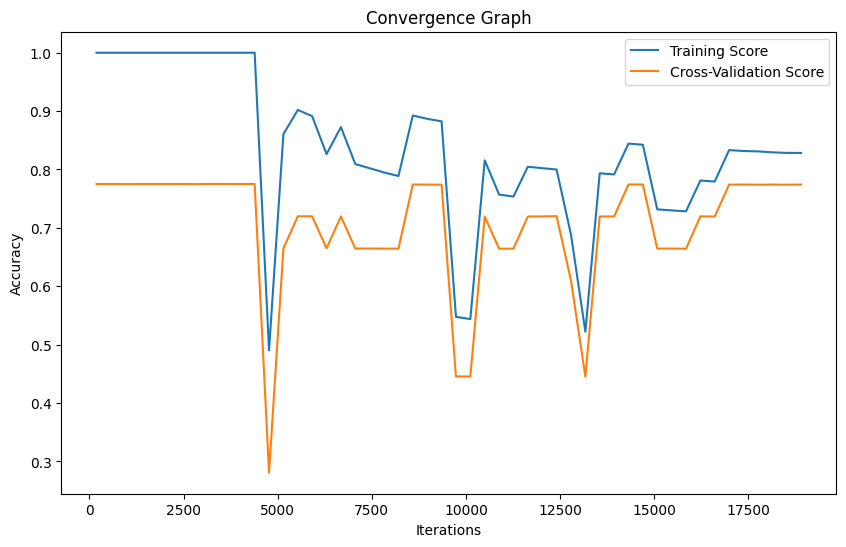

In [111]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Convergence Graph')
plt.legend(loc="best")
plt.show()